In [56]:
import mysql.connector
import pandas as pd

# Establish the connection
connection = mysql.connector.connect(
    host='localhost',        # or '127.0.0.1'
    user='root',     # your MySQL username
    password='100585Goh.', # your MySQL password
    database='platform_copy'  # your database name
)

cursor = connection.cursor(dictionary=True)  # using dictionary=True for column names in the results

In [57]:
query1 = "SELECT * FROM instant_quotes_logs"
cursor.execute(query1)

# Fetch all the rows from the result
data1 = cursor.fetchall()

# Load data into a DataFrame
df_iq = pd.DataFrame(data1)
df_iq['createdAt'] = pd.to_datetime(df_iq['createdAt'], format='%Y-%m-%d %H:%M:%S')
df_iq.head()

,id,meta,createdAt,proceeded,customerId,customerEmail,itemID,callerID,ip_address
0,0011fdb4-59ef-420f-9b6b-d8b5836176a9,"{""userID"": 1711, ""ppeType"": ""has-ppe"", ""reques...",2024-08-19 16:23:53,0,1711.0,wtoh007@gmail.com,NaN,1711.0,None
1,0041029a-e7bf-4bbb-b9dc-042d080bf4d4,"{""ppeType"": ""has-ppe"", ""request"": {""noCache"": ...",2024-08-02 04:01:32,1,813.0,purchasing@dropletmeasurement.com,6515.0,42.0,None
2,004d3070-4009-494f-bc39-9d8dc660ca1a,"{""error"": ""timeout of 60000ms exceeded"", ""user...",2024-08-05 03:53:32,0,45.0,demo@factorem.co,NaN,45.0,122.11.240.23
3,006063bf-d684-463e-a26b-fcd35bc807d8,"{""userID"": 813, ""ppeType"": ""has-ppe"", ""request...",2024-08-19 16:53:12,0,813.0,purchasing@dropletmeasurement.com,NaN,813.0,161.97.219.50
4,0077b4b4-04e0-420d-b138-d1410f173269,"{""request"": {""noCache"": true, ""process"": ""3DP""...",2024-08-12 06:09:02,0,1674.0,sean@ecoworks.sg,NaN,687.0,None


In [58]:
query2 = "SELECT * FROM users where role = 'buyer' and verificationMethod is not null"
cursor.execute(query2)

# Fetch all the rows from the result
data2 = cursor.fetchall()

# Load data into a DataFrame
df_user = pd.DataFrame(data2)
df_user.head()



,role,name,firstName,lastName,userID,email,password,companyName,companyDesc,address,...,feeType,ppeType,credits,isContactableWhatsApp,isGDPRSubjected,quotationTermsUrl,lastUploadedDate,lastAcceptedOrderDate,keyAccount,tdeType
0,buyer,PEN AVIATION,None,None,1676,engineering.penuas@penaviation.com,$2b$10$aoiSXm9Md4YIopQ/ZVwdLe2keYxwHHrGyDuCc01...,PEN AVIATION SDN BHD,None,"A-03-07 Block A, Tropicana Avenue, No.12, Pers...",...,has_fee,has-ppe,0.00,1,0,None,2024-08-02 04:10:48,NaT,0,has-tde
1,buyer,Dominic,None,None,1679,dominic790@hotmail.com,$2b$10$7CaaN4RIavzTy728M/Fg2uIJVX6gzR1hhtKrJMy...,None,None,None,...,has_fee,has-ppe,0.00,1,0,None,2024-08-02 23:58:54,NaT,0,has-tde
2,buyer,Dominic Hee,None,None,1680,dominic_hee@amat.com,$2b$10$mh/iXAJEtkpGcYfxCe/7OeNOJneTkmD.b.MOWsV...,Applied materials,None,None,...,has_fee,has-ppe,0.00,1,0,None,NaT,NaT,0,has-tde
3,buyer,Billy Park,Billy,Park,1682,billypark648@gmail.com,$2b$10$1QBjS7YSb8yyisCPHQxx5e2kFQabquuChETJXJu...,None,None,None,...,has_fee,has-ppe,0.00,0,0,None,2024-08-22 04:00:36,NaT,0,has-tde
4,buyer,Lucas Heng,Lucas,Heng,1683,lucasheng0616@gmail.com,$2b$10$9xuFUEJJz3iw6GNdAi1T9.CPBb7dnSF886iSc6n...,None,None,None,...,has_fee,has-ppe,0.00,0,0,None,2024-08-04 13:50:10,NaT,0,has-tde


In [59]:
df_user.columns

Index(['role', 'name', 'firstName', 'lastName', 'userID', 'email', 'password',
       'companyName', 'companyDesc', 'address', 'country', 'contact',
       'profilePic', 'registrationDate', 'emailVerifiedAt', 'creditType',
       'paymentTerms', 'verificationCode', 'verificationNumber',
       'verificationExpiry', 'verificationDate', 'verificationMethod', 'qAndA',
       'techTags', 'supplierGstPercent', 'xeroContactID', 'financeEmail',
       'stripeCustomerID', 'supplierDiscountPercent', 'secondaryName',
       'secondaryEmail', 'secondaryContact', 'industrySector', 'customerType',
       'ndaFileUrl', 'ndaVerified', 'ndaVerifiedDate', 'ndaVerificationLog',
       'customerStatus', 'companyID', 'feeType', 'ppeType', 'credits',
       'isContactableWhatsApp', 'isGDPRSubjected', 'quotationTermsUrl',
       'lastUploadedDate', 'lastAcceptedOrderDate', 'keyAccount', 'tdeType'],
      dtype='object')

In [60]:
df999 = df_user[['userID']]

In [61]:
user_count = len(df_user)
user_count

29

### Users signup from /signup

In [62]:
su_count = (df_user['verificationMethod']=='Verification Link').sum()
su_count

11

### Users signup from /getquotenow

In [64]:
df_signup_gqn = df_user.loc[df_user['verificationMethod']=='Verification Code']
print(f"Signup users count in Aug 2024: {len(df_signup_gqn)}")

Signup users count in Aug 2024: 18


In [65]:
df_signup_gqn = pd.merge(df_signup_gqn[['userID']], df_iq, left_on="userID", right_on="customerId", how="inner").drop(columns=['userID'])
len(df_signup_gqn)

166

In [67]:
print(f"There are total of {len(df_signup_gqn)} logs belong to {df_signup_gqn['customerId'].nunique()} users who signed up via /gqn.")

There are total of 166 logs belong to 18 users who signed up via /gqn.


### Users who didn't sign up after got quote

In [37]:
df_iq_notsignup = df_iq[df_iq['customerId'].isnull()].sort_values(by=['createdAt'])
len(df_iq_notsignup)

114

**With IP Address**

In [38]:
df_ip_notsignup = df_iq_notsignup[df_iq_notsignup['ip_address'].notna()]
ip_count = df_ip_notsignup['ip_address'].nunique()
print(f"Unique IP count: {ip_count}")

Unique IP count: 5


In [41]:
print(f"There are {len(df_ip_notsignup)} logs (contain multiple items by same user) have an IP address.")

There are 21 logs (contain multiple items by same user) have an IP address.


**Without IP Address**

In [85]:
df_noip_notsignup = df_iq_notsignup.loc[df_iq_notsignup['ip_address'].isna()].reset_index()

print(f"There are {len(df_noip_notsignup)} logs (contain multiple items by same user) do not have an IP address.")


There are 93 logs (contain multiple items by same user) do not have an IP address.


In [86]:
# Calculate the difference in seconds between consecutive rows
df_noip_notsignup['time_diff'] = df_noip_notsignup['createdAt'].diff().dt.total_seconds().fillna(0)

df_noip_notsignup.head()

,index,id,meta,createdAt,proceeded,customerId,customerEmail,itemID,callerID,ip_address,time_diff
0,720,7b4433cc-2ad8-455a-9053-62e320648457,"{""ppeType"": null, ""request"": {""process"": ""3DP""...",2024-08-03 19:22:46,0,NaN,None,NaN,NaN,None,0.0
1,675,7296a32d-784d-42d4-8366-32d667425976,"{""ppeType"": null, ""request"": {""process"": ""CNC""...",2024-08-04 05:42:42,0,NaN,None,NaN,NaN,None,37196.0
2,609,6800efef-5885-4899-ac9a-d3406f85bea8,"{""ppeType"": null, ""request"": {""process"": ""CNC""...",2024-08-04 05:42:57,0,NaN,None,NaN,NaN,None,15.0
3,1470,fd9696a3-e1fe-4354-a280-283bcaca638a,"{""ppeType"": null, ""request"": {""process"": ""Inje...",2024-08-04 12:08:45,0,NaN,None,NaN,NaN,None,23148.0
4,227,2291e503-dedc-46e4-adbb-40a6204734a4,"{""ppeType"": null, ""request"": {""process"": ""Inje...",2024-08-04 12:09:07,0,NaN,None,NaN,NaN,None,22.0


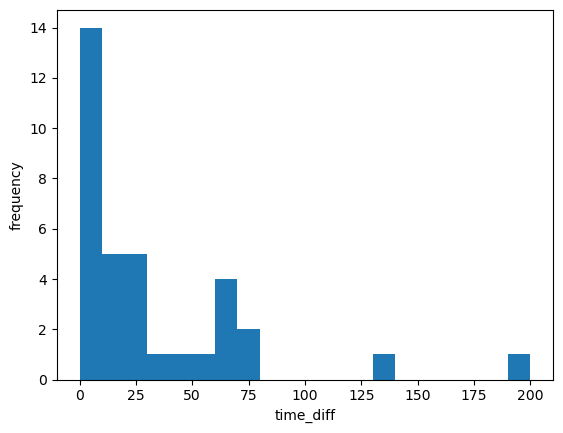

In [45]:
import matplotlib.pyplot as plt

bin_edges=[x*10 for x in range(21)]

_ = plt.hist(df_noip_notsignup['time_diff'], bins=bin_edges)
_ = plt.xlabel('time_diff')
_ = plt.ylabel('frequency')

plt.show()



In [87]:
# Create an empty list to store the group IDs
group_id = []
current_group = 0

# Iterate over the DataFrame and assign group IDs based on time_diff > 80
for i, row in df_noip_notsignup.iterrows():
    if i == 0 or row['time_diff'] > 80:  # If first row or time_diff > 80, create a new group
        current_group += 1
    group_id.append(current_group)

# Assign group IDs to a new column
df_noip_notsignup['group'] = group_id

noip_count = df_noip_notsignup['group'].max()
print(f"Estimated {noip_count} users not sign up and have no IP address.")

Estimated 61 users not sign up and have no IP address.


In [88]:
df_noip_notsignup.head()

,index,id,meta,createdAt,proceeded,customerId,customerEmail,itemID,callerID,ip_address,time_diff,group
0,720,7b4433cc-2ad8-455a-9053-62e320648457,"{""ppeType"": null, ""request"": {""process"": ""3DP""...",2024-08-03 19:22:46,0,NaN,None,NaN,NaN,None,0.0,1
1,675,7296a32d-784d-42d4-8366-32d667425976,"{""ppeType"": null, ""request"": {""process"": ""CNC""...",2024-08-04 05:42:42,0,NaN,None,NaN,NaN,None,37196.0,2
2,609,6800efef-5885-4899-ac9a-d3406f85bea8,"{""ppeType"": null, ""request"": {""process"": ""CNC""...",2024-08-04 05:42:57,0,NaN,None,NaN,NaN,None,15.0,2
3,1470,fd9696a3-e1fe-4354-a280-283bcaca638a,"{""ppeType"": null, ""request"": {""process"": ""Inje...",2024-08-04 12:08:45,0,NaN,None,NaN,NaN,None,23148.0,3
4,227,2291e503-dedc-46e4-adbb-40a6204734a4,"{""ppeType"": null, ""request"": {""process"": ""Inje...",2024-08-04 12:09:07,0,NaN,None,NaN,NaN,None,22.0,3


In [89]:
total_count = user_count + ip_count + noip_count

In [90]:
data = {
    'month':['8'],
    'tot_signup' :[user_count],
    'su_signup':[su_count],
    'gqn_signup': [gqn_count],
    'ip_nsignup':[ip_count],
    'noip_nsignup':[noip_count],
    'no_user_upload_part':[total_count]
}

df0 = pd.DataFrame(data)
df0

,month,tot_signup,su_signup,gqn_signup,ip_nsignup,noip_nsignup,no_user_upload_part
0,8,29,11,18,5,61,95


### Analysis on using own / sample files

In [77]:
def extract_cad_file_location(meta_json):
    try:
        json_data = json.loads(meta_json)
        return json_data['request']['parameters']['customer_cad_file_location']
    except (KeyError, json.JSONDecodeError):
        return None  # Return None if the JSON structure is invalid or key is missing

def searchforownfile(df, variable):
    # Extract 'customer_cad_file_location' and store in a new column 'cad_file_location'
    df['cad_file_location'] = df['meta'].apply(extract_cad_file_location)

    # Create the 'usingsamplefile' column by checking if 'Factorem_Sample_Part' is in 'cad_file_location'
    df['usingownfile'] = df['cad_file_location'].apply(lambda x: 0 if x and 'Factorem_Sample_Part' in x else 1)
    
    df_grouped = df.groupby(variable)['usingownfile'].sum().reset_index()
    return df_grouped

In [80]:
dftemp = searchforownfile(df_signup_gqn, 'customerId')
dftemp.head()

,customerId,usingownfile
0,1682.0,48
1,1683.0,3
2,1691.0,5
3,1692.0,5
4,1694.0,1


In [81]:
dftemp2 = searchforownfile(df_ip_notsignup, 'ip_address')
dftemp2.head()

C:\Users\leeting\AppData\Local\Temp\ipykernel_17068\928413337.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cad_file_location'] = df['meta'].apply(extract_cad_file_location)
C:\Users\leeting\AppData\Local\Temp\ipykernel_17068\928413337.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['usingownfile'] = df['cad_file_location'].apply(lambda x: 0 if x and 'Factorem_Sample_Part' in x else 1)


,ip_address,usingownfile
0,111.65.45.200,4
1,122.11.240.23,4
2,2406:3003:2004:7ddc:b090:cdf9:31cd:fa9c,3
3,2406:3003:2005:3091:206c:efa4:6570:d438,4
4,2803:de10:2:2288:e9e1:f138:61f6:e515,0


In [91]:
dftemp3 = searchforownfile(df_noip_notsignup, 'group')
dftemp3.head()

,group,usingownfile
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [92]:
len(dftemp) + len(dftemp2) + len(dftemp3)

84

**#Users who used sample file only**

In [101]:
samplefilecount = (dftemp['usingownfile']==0).sum() + (dftemp2['usingownfile']==0).sum() + (dftemp3['usingownfile']==0).sum()
print(f"{samplefilecount} users used /gqn to upload sample files for quote.")

37 users used /gqn to upload sample files for quote.


In [102]:
ownfilecount = (dftemp['usingownfile']>0).sum() + (dftemp2['usingownfile']>0).sum() + (dftemp3['usingownfile']>0).sum()
print(f"{ownfilecount} users used /gqn to upload own files for quote.")

47 users used /gqn to upload own files for quote.


In [93]:
df_signup_gqn
len(df_gqn)

84

import json
# Function to check if 'Factorem_Sample_Part' is in 'customer_cad_file_location'
def extract_cad_file_location(meta_json):
    try:
        json_data = json.loads(meta_json)
        return json_data['request']['parameters']['customer_cad_file_location']
    except (KeyError, json.JSONDecodeError):
        return None  # Return None if the JSON structure is invalid or key is missing

# Extract 'customer_cad_file_location' and store in a new column 'cad_file_location'
df_gqn['cad_file_location'] = df_gqn['meta'].apply(extract_cad_file_location)

# Create the 'usingsamplefile' column by checking if 'Factorem_Sample_Part' is in 'cad_file_location'
df_gqn['usingownfile'] = df_gqn['cad_file_location'].apply(lambda x: 0 if x and 'Factorem_Sample_Part' in x else 1)

df_gqn.head()